# Exploratory data analysis of the Disney Movie datasets

# Introduction

## Question(s) of interests
In this analysis, I like to investigate few questions associated with the collection of Disney Movies datasets. I'm interested to find trend of inflation_adjusted_gross across genre and trend of movies released by Disney in each decade.My assumption is that Comedy movies generate the most revenue because the largest portion of viewers like to watch Comedy movies. In addition to this Iam finding the count of Movies by Directors and  movies that have more number of parts.

## Dataset description 

The data were obtain from **data.world** which follows a Creative Common Attribution 4.0 International License

"Disney+ covers over 100 years of its flagship studio’s history, from early animated shorts to groundbreaking full-length animated features to family live-action classics to the blockbuster triumvirate of superheroes.Disney seems to be successfull with children since the first movie, and everytime this company gets bigger and bigger with their animations and thematic parks.

The disney movie dataset is composed of $5$ tables, `disney_movies_total_gross.csv`, `disney_revenue_1991-2016.csv`, `disney-characters.csv`, `disney-director.csv`,`disney-voice-actors.csv` . Each table is stored in a `.csv` file and contains different information about disney movies including movie names, released date, genre, Motion Picture Association film rating of the movie, total gross of the movie, directors, voice actors, and so on.

I will be using the `disney_movies_total_gross` ,`disney-characters` and  `disney-director` tables formally described below:

* **disney_movies_total_gross**
    * This file contains information on gross value of each movie, including title of movie, the year it was released, genre, MPAA rating, total gross and inflation adjusted genre

* **disney-director.csv**
    * This file includes information on the director including title of movie and the director.

# Methods and Results

Importing libraries and datasets that is need in this analysis. This implies that I'm using disney_movies_total_gross & disney_director

Let us import the tables that we need and do some basic visualizations.

In [170]:
## Lets import all the required libraries needed for this analysis
import altair as alt
import pandas as pd

In [171]:
#import all the required files
disney_movies_gross = pd.read_csv("data/disney_movies_total_gross.csv")
disney_director = pd.read_csv("data/disney-director.csv")

Let's see what the tables look like.

In [172]:
disney_movies_gross.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"


In [173]:
disney_director.head()

,name,director
0,Snow White and the Seven Dwarfs,David Hand
1,Pinocchio,Ben Sharpsteen
2,Fantasia,full credits
3,Dumbo,Ben Sharpsteen
4,Bambi,David Hand


Let's get some other information about the **disney_movies_total_gross** table.

In [174]:
disney_movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   MPAA_rating               523 non-null    object
 4   total_gross               579 non-null    object
 5   inflation_adjusted_gross  579 non-null    object
dtypes: object(6)
memory usage: 27.3+ KB


The disney_movies_total_gross table has $579$ rows and $6$ columns. Every **movie_title** has a **release_date**, **genre**,  **MPAA_rating** , **total_gross** and **inflation_adjusted_gross**.
 There are few null values in MPAA_rating and genre

Let's get some other information about the **disney_director** table.

In [175]:
disney_director.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      56 non-null     object
 1   director  56 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


The disney_director table has  56  rows and  2  columns. Every movie_title has a director. 

In [176]:
#Let us fill null values in dataset, disney_movies_total_gross and disney_characters  with 'NaN'
disney_movies_gross = disney_movies_gross.fillna("NaN")
disney_characters = disney_characters.fillna("NaN")

In [177]:
#Let's convert the variable release_date to datetime
disney_movies_gross = disney_movies_gross.assign(release_date=pd.to_datetime(disney_movies_gross['release_date']))
disney_movies_gross.iloc[0:6,0:7]

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,1940-02-09,Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,1940-11-13,Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,1946-11-12,Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,1950-02-15,Drama,G,"$85,000,000","$920,608,730"
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,NaN,"$28,200,000","$528,279,994"


In [178]:
#Let us strip the $ symbol from total_gross and inflation_adjusted gross
disney_movies_gross = disney_movies_gross.assign(total_gross = disney_movies_gross['total_gross'].str.strip('$'),inflation_adjusted_gross = disney_movies_gross['inflation_adjusted_gross'].str.strip('$'))
disney_movies_gross.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,"184,925,485","5,228,953,251"
1,Pinocchio,1940-02-09,Adventure,G,"84,300,000","2,188,229,052"
2,Fantasia,1940-11-13,Musical,G,"83,320,000","2,187,090,808"
3,Song of the South,1946-11-12,Adventure,G,"65,000,000","1,078,510,579"
4,Cinderella,1950-02-15,Drama,G,"85,000,000","920,608,730"


In [179]:
#Let us strip the ',' symbol from total_gross and inflation_adjusted gross
disney_movies_gross = disney_movies_gross.assign(total_gross = disney_movies_gross['total_gross'].str.replace(',',''),inflation_adjusted_gross = disney_movies_gross['inflation_adjusted_gross'].str.replace(',',''))
disney_movies_gross.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [180]:
#Let us cast the datatype of total_gross and inflation_adjusted_gross to 'int' type
disney_movies_gross = disney_movies_total_gross.assign(total_gross = disney_movies_total_gross['total_gross'].astype(int),inflation_adjusted_gross = disney_movies_total_gross['inflation_adjusted_gross'].astype(int))
disney_movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   movie_title               579 non-null    object        
 1   release_date              579 non-null    datetime64[ns]
 2   genre                     579 non-null    object        
 3   MPAA_rating               579 non-null    object        
 4   total_gross               579 non-null    int64         
 5   inflation_adjusted_gross  579 non-null    int64         
 6   decade                    579 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 31.8+ KB


### 1. Trend of inflation_adjusted_gross across genre

**Iam interested to find**
    
    i. the number of Disney movies released decade wise
    ii. Genre of Movie which collected maximum inflation_adjusted_gross in a decade where most number of movies were released 
    iii. Genre of Movie that gained maximum inflation_adjusted_gross ever in disney's history

***i. Let's analyse the number of Disney movies released in decade wise.***


In [181]:
# category each release_date. The possible categories are:
    # <=1950
    # 1951 to 1960
    # 1961 to 1970
    # 1971 to 1980
    # 1981 to 1990
    # 1991 to 2000
    # 2001 to 2009
    # 2011 to 2020

df = pd.DataFrame(disney_movies_gross)
lis = []
#def trend_disney(i):
for i in range(579):
    #print(i)
    if df['release_date'][i].year > 2010:
        lis.append('2011-2020')
    elif df['release_date'][i].year <= 2010 and df['release_date'][i].year > 2000:
        lis.append('2001-2010')
    elif df['release_date'][i].year <= 2000 and df['release_date'][i].year > 1990:
        lis.append('1991-2000')
    elif df['release_date'][i].year <= 1990 and df['release_date'][i].year > 1980:
        lis.append('1981-1990')
    elif df['release_date'][i].year <= 1980 and df['release_date'][i].year > 1970:
        lis.append('1971-1980')
    elif df['release_date'][i].year <= 1970 and df['release_date'][i].year > 1960:
        lis.append('1961-1970')
    elif df['release_date'][i].year <= 1960 and df['release_date'][i].year > 1950:
        lis.append('1951-1960')
    else:
        lis.append('<=1950')
df['decade'] = lis
disney_movies = df
disney_movies.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,decade
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,<=1950
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,<=1950
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,<=1950
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,<=1950
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,<=1950


In [182]:
import new_script as ps
#Count the number of movies released in a decade by grouping 'decade' by calling function 'grouped_sum'
# run it on the data
movie_count = (ps.grouped_sum(disney_movies,'decade','movie_title',action ='count'))
movie_count

,decade,count
0,1951-1960,3
1,1961-1970,9
2,1971-1980,9
3,1981-1990,74
4,1991-2000,240
5,2001-2010,167
6,2011-2020,72
7,<=1950,5


Here we can see most number of  movies were released in bewteen **1991-2000**

***ii. find the Genre of Movie which collected maximum inflation_adjusted_gross in a decade where most number of movies were released*** 

***a. Let's total the inflation_adjusted_gross in each decade***

In [183]:
movie_gross_decade = pd.DataFrame(disney_movies.groupby('decade')['inflation_adjusted_gross'].agg('sum').sort_values(ascending=False))
movie_gross_decade

,inflation_adjusted_gross
decade,
1991-2000,18228519656
2001-2010,15702362616
<=1950,11603392420
2011-2020,11527958753
1981-1990,5819450659
1961-1970,3345846472
1951-1960,1785821341
1971-1980,750149080


Here we can find that Disney made maximum revenue in **1991-2000** Since they have released maximum number of movies in that decade 

***b. Next I want to analyse what Genre of Movie collected more revenue in  1991-2000***

In [184]:
#Lets group our dataset 'disney_movies' based on 1990-2000
inflation_adj_gross_genre = pd.DataFrame(disney_movies.groupby('decade').get_group('1991-2000')[['inflation_adjusted_gross','genre']])
inflation_adj_gross_genre.reset_index()

,index,inflation_adjusted_gross,genre
0,100,69540672,Adventure
1,101,19149495,Comedy
2,102,30084149,Adventure
3,103,24939118,Romantic Comedy
4,104,47181395,Comedy
...,...,...,...
235,335,180742479,Drama
236,336,148208901,Thriller/Suspense
237,337,104055039,Comedy
238,338,136789252,Adventure


Let us calculate the mean value of **inflation_adjusted_gross (1991 to 2000)**


In [185]:
#For each type of genre, find the average value of inflation_adjusted_gross for 1991 to 2000
#and the number of the movies for that genre type.

inflation_adj_gross_mean= pd.DataFrame(inflation_adj_gross_genre.groupby('genre').agg(['count','mean']).loc[:,'inflation_adjusted_gross']).sort_values(by='mean',ascending=False)
inflation_adj_gross_mean

,count,mean
genre,,
Adventure,33,1.473251e+08
Musical,6,1.126134e+08
Action,18,1.010554e+08
Thriller/Suspense,11,9.116094e+07
Western,3,7.360254e+07
Comedy,90,6.702017e+07
Drama,52,5.337510e+07
Romantic Comedy,13,4.893067e+07
Black Comedy,2,3.998614e+07


From this analysis, I understand that during 1991 to 2000, majority of people liked to watch **Adventure Movies** eventhough the most number of Movies released during 1991 to 2000 were Comedy movies.

#### Pie Chart of mean inflation_adjusted_gross for the period 1991 to 2000

Next, let's plot a **pie chart** of the genre with the mean of inflation_adjusted_gross for the period 1991 to 2000

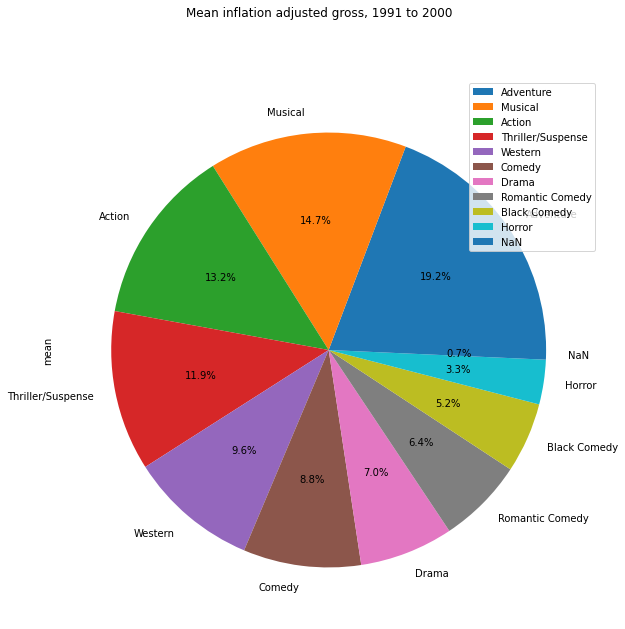

In [186]:
plot = inflation_adj_gross_mean.plot.pie(y ='mean',subplots=True,figsize=(10, 10), autopct ='%1.1f%%',title = 'Mean inflation adjusted gross, 1991 to 2000')


**iii. Genre of Movie that gained maximum inflation_adjusted_gross in overall years**

Let us analysis the **mean of inflation_adjusted_gross** for each type of genre( for the whole dataset "disney_movies")

In [187]:
##Let us calculate the mean value of inflation_adjusted_gross 
#For each type of genre, find the average value of inflation_adjusted_gross for all release_dates
#and the number of the movies for that genre type.
movies_genre_group = pd.DataFrame(disney_movies.groupby(by='genre').agg(['count','mean']).loc[:,'inflation_adjusted_gross']).sort_values(by='mean',ascending=False)
movies_genre_group

,count,mean
genre,,
Musical,16,6.035979e+08
Adventure,129,1.903974e+08
Action,40,1.374734e+08
Thriller/Suspense,24,8.965379e+07
Comedy,182,8.466773e+07
Romantic Comedy,23,7.777708e+07
Western,7,7.381571e+07
Drama,114,7.189302e+07
Concert/Performance,2,5.741084e+07


#### Pie Chart of mean inflation_adjusted_gross in overall years

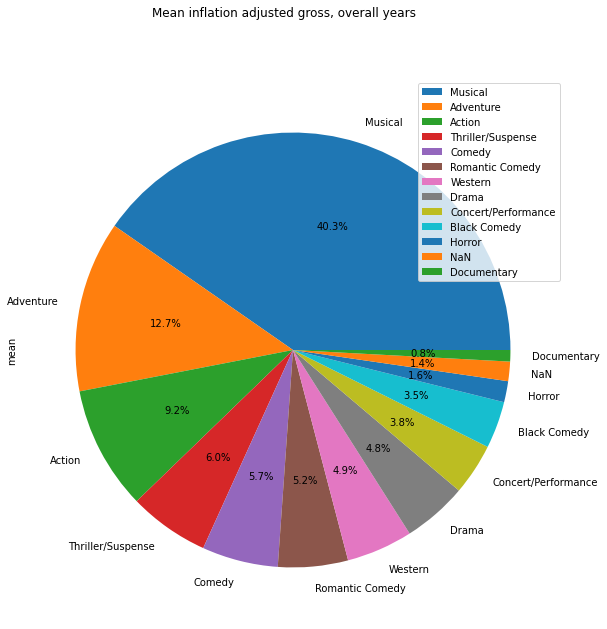

In [188]:
overall_plot = movies_genre_group.plot.pie(y='mean',subplots=True,figsize=(10, 10), autopct='%1.1f%%',title='Mean inflation adjusted gross, overall years')

The result what I got is really suprising, **Musical genre** movies gained high inflation_adjusted_gross eventhough the most number of movies released were comedy. The first movie produced by Disney was a musical which was classic **'Snow White and Seven dwarfs'** and this movie collected maximum revenue which has an inflation_adjusted_gross of $522,895,3251

### 2. Trend of movies released by Disney in each decade

In [189]:
#compute the number of movies released in each genre for each decade

genre_trend = pd.DataFrame(disney_movies.groupby(['decade','genre'])['genre'].agg('count'))
genre_trend

genre
decade    genre                     
1951-1960 Adventure                1
          Drama                    2
1961-1970 Adventure                1
          Comedy                   5
          Musical                  3
1971-1980 Adventure                1
          Comedy                   2
          Musical                  1
          NaN                      5
1981-1990 Action                   6
          Adventure               13
          Comedy                  30
          Drama                   18
          Horror                   1
          NaN                      1
          Romantic Comedy          3
          Thriller/Suspense        2
1991-2000 Action                  18
          Adventure               33
          Black Comedy             2
          Comedy                  90
          Drama                   52
          Horror                   3
          Musical                  6
          NaN                      9
          Romantic Comedy         13
          Thriller/Suspense       11
          Western                  3
2001-2010 Action                   8
          Adventure               46
          Black Comedy             1
          Comedy                  47
          Concert/Performance      2
          Documentary             11
          Drama                   28
          Horror                   1
          Musical                  3
          NaN                      2
          Romantic Comedy          6
          Thriller/Suspense        9
          Western                  3
2011-2020 Action                   8
          Adventure               32
          Comedy                   8
          Documentary              5
          Drama                   13
          Horror                   1
          Musical                  1
          Romantic Comedy          1
          Thriller/Suspense        2
          Western                  1
<=1950    Adventure                2
          Drama                    1
          Musical                  2

What I inferred from this analysis is, in different decades Disney focused on making movies from different genres. From **1961-2010** they mostly focused on **comedy movies** even though adventure movies and romantic comedy  performed much better. From **2011-2020**, they started to focus on **Adventure Movies**

### 3. Count of Movies by Directors

While considering the dataset Disney Director, Let's analyse and find who Directed the most number of movies

#### Bar plot of number of movies by each director

In [190]:
director_count = pd.DataFrame(disney_director.groupby("director")['name'].agg('count'))
director_count = director_count.reset_index()
director_count
#director_group.iloc[0:28]
director_plot = alt.Chart(director_count,width = 500, height = 300).mark_bar().encode(
    x = alt.X('director:N',sort ='y',title = "Name of Directors"),
    y = alt.Y('name:Q',title="Number of movies directed")).properties(
    title = "Bar plot of number of movies by each director")
director_plot

alt.Chart(...)

**Wolfgang Reitherman** and **Ron Clements** directed most number of movies

#### 4. Movies that have more number of parts

Let us analysis how many **parts** were released for movies from the dataframe disney_movies

In [191]:
disney_movie_parts = pd.DataFrame(disney_movies['movie_title'].value_counts())
disney_movie_parts

,movie_title
The Jungle Book,3
Bad Company,2
Freaky Friday,2
101 Dalmatians,2
Cinderella,2
...,...
A Far Off Place,1
Casanova,1
Toy Story 2,1
Ransom,1


Here, I found that **The Jungle Book** has 3 parts. (Note: to find who directed movie with most inflated gross, need to merge director table with disney_movies_total_gross. Few movies have different parts (released on different year) and if we merge disney_director  with disney_movies_total_gross  based on movie_title, director name will appear same in same movie name  and gross also repeat. And it does not make any sense. For example, 101 Dalmatians has 2 releases, and actually both are directed by different directors.)

# Discussions

In this work, I analyzed the Disney dataset and tried to compute the following

1. Trend of inflation_adjusted_gross across genre
  
     Here I divided my work into three categories
  
        i. the number of Disney movies released decade wise
        ii. Genre of Movie which collected maximum inflation_adjusted_gross in a decade 
         where most  number of movies were released 
        iii. Genre of Movie that gained maximum inflation_adjusted_gross ever in disney's history

            Here we can find that Disney made maximum revenue in 1991-2000, since they have released maximum number of movies in that decade. From this analysis, I understand that during 1991 to 2000, majority of people liked to watch Adventure Movies eventhough the most number of Movies released during 1991 to 2000 were Comedy movies.
            
            When I anaysed Genre of Movie that gained maximum inflation_adjusted_gross ever in disney's history, the result what I got is really suprising, Musical genre movies gained high inflation_adjusted_gross. I was of the impression that comedy movies would have collected most inflation adjusted gross because most number of movies released were Musical.  The first movie produced by Disney was a musical which was classic 'Snow White and Seven dwarfs' and this movie collected maximum revenue which has an inflation_adjusted_gross of $522,895,3251
     
     
2. Trend of movies released by Disney in each decade

        What I inferred from this analysis is, in different decades Disney focused on making movies from different genres. From 1961-2010 they mostly focused on comedy movies even though adventure movies and romantic comedy  performed much better. From 2011-2020, they started to focus on Adventure Movies

3. Count of Movies by Directors

    Wolfgang Reitherman and Ron Clements directed most number of movies

4. Movies that have more number of parts
    
    The Jungle Book has 3 parts. 
  
  By analysing the trend of inflation_adjusted_gross across genre, Disney can focus on those genre of movies in future.
  
  
  I liked to find out whether MPAA rating had any impact on the gross value. The common assumption is that G-rated movies generate the most revenue because the largest portion of viewers are allowed admittance to these movies, children and adults alike.



In [157]:
!pytest test_new_script.py

============================= test session starts ==============================
platform linux -- Python 3.8.5, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
rootdir: /home/jupyter/prog-python-ds-students/release/final_project
plugins: anyio-3.0.1, dash-1.20.0
collected 1 item                                                               

test_new_script.py .                                                     [100%]

============================== 1 passed in 0.46s ===============================


In [158]:
!flake8 new_script.py

new_script.py:1:35: E231 missing whitespace after ','
new_script.py:1:54: E251 unexpected spaces around keyword / parameter equals
new_script.py:3:1: W293 blank line contains whitespace
new_script.py:8:1: W293 blank line contains whitespace
new_script.py:11:1: W293 blank line contains whitespace
new_script.py:21:76: W291 trailing whitespace
new_script.py:22:22: W291 trailing whitespace
new_script.py:23:1: W293 blank line contains whitespace
new_script.py:26:32: W291 trailing whitespace
new_script.py:27:80: E501 line too long (82 > 79 characters)
new_script.py:28:1: W293 blank line contains whitespace
new_script.py:37:1: W293 blank line contains whitespace
new_script.py:41:1: W191 indentation contains tabs
new_script.py:41:1: E101 indentation contains mixed spaces and tabs
new_script.py:42:1: W191 indentation contains tabs
new_script.py:42:1: E101 indentation contains mixed spaces and tabs
new_script.py:47:80: E501 line too long (85 > 79 characters)
new_script.py:48:43: W291 trailing wh

In [167]:
!black new_script.py

All done! ✨ 🍰 ✨
1 file left unchanged.


In [168]:
!flake8 new_script.py

new_script.py:8:1: W293 blank line contains whitespace
new_script.py:11:1: W293 blank line contains whitespace
new_script.py:21:76: W291 trailing whitespace
new_script.py:22:22: W291 trailing whitespace
new_script.py:23:1: W293 blank line contains whitespace
new_script.py:26:32: W291 trailing whitespace
new_script.py:27:80: E501 line too long (82 > 79 characters)
new_script.py:28:1: W293 blank line contains whitespace
new_script.py:37:1: W293 blank line contains whitespace
new_script.py:41:1: W191 indentation contains tabs
new_script.py:41:1: E101 indentation contains mixed spaces and tabs
new_script.py:42:1: W191 indentation contains tabs
new_script.py:42:1: E101 indentation contains mixed spaces and tabs
new_script.py:47:80: E501 line too long (85 > 79 characters)


In [164]:
!black final_project_divya.ipynb

reformatted final_project_divya.ipynb
All done! ✨ 🍰 ✨
1 file reformatted.


In [165]:
!black test_new_script.py

reformatted test_new_script.py
All done! ✨ 🍰 ✨
1 file reformatted.


In [166]:
!flake8 test_new_script.py

test_new_script.py:2:74: W291 trailing whitespace
